<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Ago25-26/Ago25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


data1 = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men (1).txt", delimiter=',').T
x = np.array(data1[0])
y = np.array(data1[1])

In [ ]:
#Método con inversa
def w(x, y):
  X = np.vstack((np.ones_like(x), x)).T #CREA UNA FILA DE VECTORES UNO, una con X y luego crea la matriz
  t = y
  print(t.shape, X.shape)
  XX = np.matmul(X.T, X)
  invXX = np.linalg.inv(XX)
  Xt = np.matmul(X.T, t)
  w = np.matmul(invXX, Xt)
  return w


W = w(x, y)
w0 = W[0]
w1 = W[1]

(27,) (27, 2)


In [ ]:
#Método sin inversa
def w1(x, y):
  X = np.vstack((np.ones_like(x), x)).T #CREA UNA FILA DE VECTORES UNO, una con X y luego crea la matriz
  t = y
  print(t.shape, X.shape)
  XX = np.matmul(X.T, X)
  Xt = np.matmul(X.T, t)
  w = np.linalg.solve(XX, Xt)
  return w

W1 = w(x, y)
w0 = W1[0]
w1 = W1[1]

(27,) (27, 2)


In [ ]:
#Mínimos cuadrados regularizados:
#Para los mínimos cuadrados regularizados se regulariza la manera en la que se
#aproxima, no es bueno que nuestra aproximación toque todos los puntos
#Para regularizar se usa lambda

def wn(x, t, n):
  pol = np.zeros((n, len(x)))
  for i in range(1, n+1):
    pol[i - 1] = x**i
  X = np.vstack((np.ones_like(X), pol))
  w = (np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, t)))

  costo = np.matmul((t-np.matmul(X, w)).T, t-np.matmul(X,w))
  return w, costo/len(y)



In [ ]:
def w_n(x, y, norder):
  x = np.asarray([x])
  X = np.ones_like(x)
  for n in range(1, norder + 1):
    X = np.append(X, x**n, axis = 0)
  X = X.T
  t = y
  XX = np.matmul(X.T, X)
  invXX = np.linalg.inv(XX)
  Xt = np.matmul(X.T, t)
  w = np.matmul(invXX, Xt)
  cost = 0
  f = 0
  for i in range(len(w)):
    f += w[i]*x**i
  cost = (y-f)**2
  cost = cost.sum()
  return w, cost

In [ ]:
def w_n1(x, y, norder, lbda = 0):
  x = np.asarray([x])
  X = np.ones_like(x)

  for n in range(1, norder + 1):
    X = np.append(X, x**n, axis = 0)
  X = X.T
  t = y
  XX = np.matmul(X.T, X)
  NI = len(X)*lbda*np.identity(len(XX))
  invXX = np.linalg.inv(XX + NI)
  Xt = np.matmul(X.T, t)
  w = np.matmul(invXX, Xt)
  cost = 0
  f = 0
  for i in range(len(w)):
    f += w[i]*x**i
  cost = (y-f)**2
  cost = cost.sum()
  return w, cost

7.538576178108003
1.277479461872996
1.0820769729269841
0.8546967886398947
0.7696683213010017


Text(0.5, 0, 'Año olimpico')

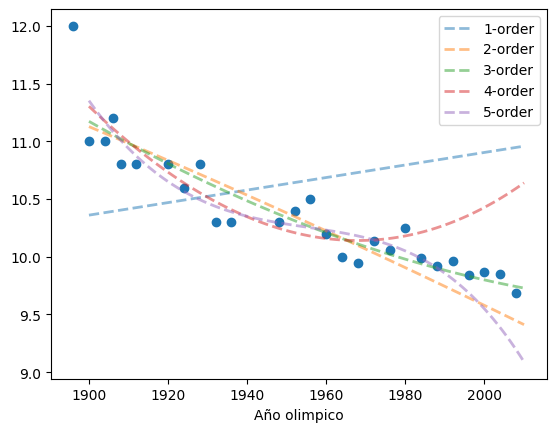

In [ ]:
x_test = np.linspace(1900, 2010, 100)
norder = 5
plt.scatter(x, y)

for n in range(1, norder + 1):
  w_test, cost = w_n1(x[:20], y[:20], n, lbda = 0.2)
  ftest = 0
  for i in range(len(w_test)):
    ftest += w_test[i]* x_test**i
  plt.plot(x_test, ftest, '--', linewidth = 2, label  = f'{n}-order', alpha = 0.5)
  print(cost)
plt.legend()
plt.xlabel('Año olimpico')

In [ ]:
def cross(x, y, n):
  samples = len(x)
  totalc = 0

  for i in range(samples):
    x_val = x[i]
    y_val = y[i]

    x_train = np.delete(x, i)
    y_train = np.delete(y, i)

    w_aux, cost = w_n1(x_train, y_train, n, lbda = 2)
    totalc += cost
  return totalc/samples

Text(0, 0.5, 'Lost LOOCV')

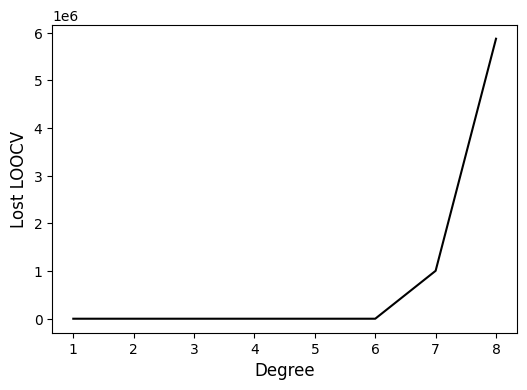

In [ ]:
degree = 8
degrees = np.arange(1, degree+1)
loocv = [cross(x, y, i) for i in range(1, degree+1)]
fig = plt.figure(figsize = (6, 4))
plt.plot(degrees, loocv, 'k')
plt.xlabel('Degree', fontsize = 12)
plt.ylabel('Lost LOOCV', fontsize = 12)